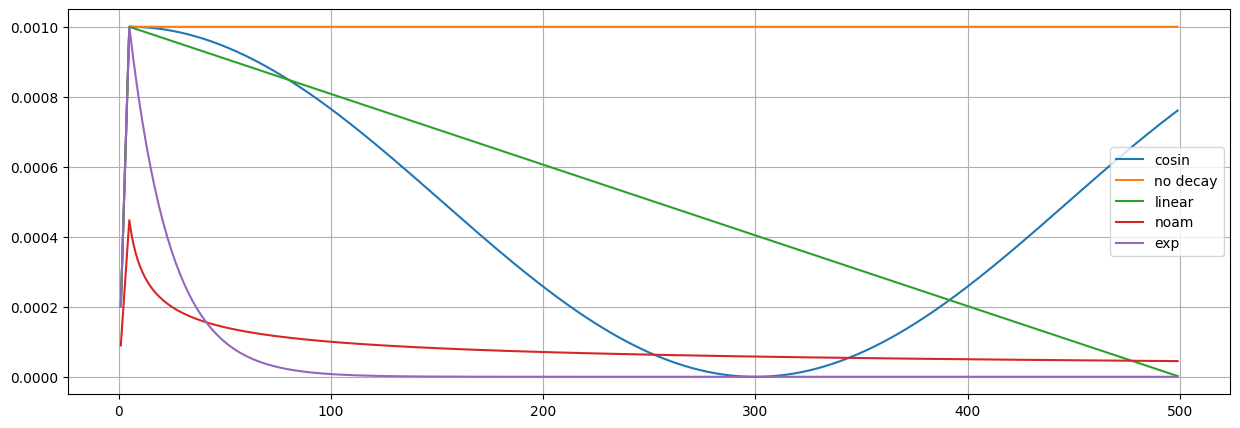

In [4]:
from lr_scheduler import Cosine, NoDecay, Linear, Noam, Exponential
import matplotlib.pyplot as plt


import torch.optim as optim
import torch.nn as nn
class ResidualBlock(nn.Module):
    """ 残差块

    """
    def __init__(self, in_channel=128, out_channel=128, downsample=None):
        super(ResidualBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channel)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channel)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out
    
if __name__ == "__main__":
    rs_network = ResidualBlock()
    optimizer = optim.Adam(rs_network.parameters(), lr=0.001)

    cossin_lr = Cosine(optimizer=optimizer, start_lr=1e-3, 
                          warmup_iter=5, end_iter=500, num_iter=0)
    no_decay_lr = NoDecay(optimizer=optimizer, start_lr=1e-3, 
                          warmup_iter=5, end_iter=500, num_iter=0)
    linear_lr = Linear(optimizer=optimizer, start_lr=1e-3, 
                          warmup_iter=5, end_iter=500, num_iter=0)
    noam_lr = Noam(optimizer=optimizer, start_lr=1e-3, 
                          warmup_iter=5, end_iter=500, num_iter=0)
    exp_lr = Exponential(optimizer=optimizer, start_lr=1e-3, 
                          warmup_iter=5, end_iter=500, num_iter=0)
    
    cossin_lr_list = []
    no_decay_lr_list = []
    linear_lr_list = []
    noam_lr_list = []
    exp_lr_list = []
    x = []
    
    for i in range(1, 500):
        cossin_lr.step()
        no_decay_lr.step()
        linear_lr.step()
        noam_lr.step()
        exp_lr.step()

        # print(cossin_lr.current_lr)
        x.append(i)
        cossin_lr_list.append(cossin_lr.current_lr)
        no_decay_lr_list.append(no_decay_lr.current_lr)
        linear_lr_list.append(linear_lr.current_lr)
        noam_lr_list.append(noam_lr.current_lr)
        exp_lr_list.append(exp_lr.current_lr)

# print(cossin_lr_list)
plt.figure(figsize=(15,5)) 
# 绘制三条曲线
plt.plot(x, cossin_lr_list, label='cosin')
plt.plot(x, no_decay_lr_list, label='no decay')
plt.plot(x, linear_lr_list, label='linear')
plt.plot(x, noam_lr_list, label='noam')
plt.plot(x, exp_lr_list, label='exp')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图表
plt.show()